In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [3]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
sys.path.append('../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
%matplotlib notebook

In [6]:
dirname = r'/data/new_trap/20191024/Bead1/Shaking/'
BDF_shaking1 = load_dir(dirname=dirname,file_prefix='Shaking2')
BDF_shaking2 = load_dir(dirname=dirname,file_prefix='Shaking3')

200  files in folder
200  files loaded
200  files in folder
200  files loaded


In [7]:
### calibration data 
fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(27,32)]
bdf_repeat_calib = [BeadDataFile.BeadDataFile(file) for file in files]

In [8]:
### no-bead data 
fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/Shaking{}_0.h5'
files = [fname.format(ff_) for ff_ in range(30,42)]
bdf_repeat_shake_nobead = [BeadDataFile.BeadDataFile(file) for file in files]

<IPython.core.display.Javascript object>


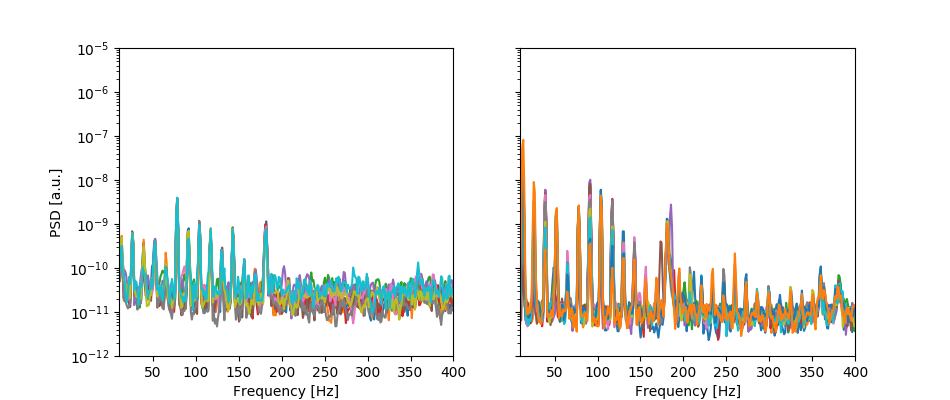

Text(0, 0.5, 'PSD [a.u.]')

In [9]:
bdf = BDF_shaking1[10]
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
[ax[0].semilogy(*bdf_.welch_psd('x')) for bdf_ in BDF_shaking1[50:60]]
[ax[1].semilogy(*bdf_.welch_psd('x')) for bdf_ in bdf_repeat_shake_nobead]
[a.set(xlim=(10,400), ylim=(1e-12,1e-5)) for a in ax]
ax[0].set_xlabel('Frequency [Hz]')
ax[1].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('PSD [a.u.]')

In [70]:
bdf_shake1 = bdf_repeat_shake_nobead[2]

In [79]:
[print(np.max(bdf_shake1.cant_pos[1]*50)-np.min(bdf_shake1.cant_pos[1]*50), np.mean(bdf_shake1.cant_pos[1]*50)) for bdf_shake1 in BDF_shaking2[100:200]]
# [print(np.mean(bdf_shake1.cant_pos[0]*50)) for bdf_shake1 in BDF_shaking1[:10]]

138.85851882540717 199.42672477241666
138.84894124655526 199.4166161194523
138.84373612100586 199.4068471085685
138.84951282151437 199.39852995314948
138.83970589861013 199.38994531564444
138.84938175246924 199.3812552636077
138.85553480002318 199.37175093882902
138.85878244154262 199.3616040479362
138.8540350480708 199.3522962703435
138.85237421686173 199.3430820054313
138.83874567473632 199.3351230031161
138.8762205819101 199.3243316550263
138.8459277816691 199.31515713246972
138.86756396355486 199.30569003998536
138.85092165624363 199.29699329851832
138.85805798634948 199.2874991496703
138.82185317198343 199.2782691440083
138.837595724823 199.2676946500755
138.844299789354 199.25766649192522
138.8372319266396 199.24891830344004
138.85964996781453 199.2378891004914
138.8364827676629 199.22899564681106
138.86280592827984 199.2197157311857
138.86800125309605 199.21024043453644
138.83784066219377 199.20128258365548
138.84938451818124 199.19274811600079
138.83944655960076 199.18329496905

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [51]:
print(np.max(bdf.cant_pos[1]*50)-np.min(bdf.cant_pos[1]*50), np.std(bdf.cant_pos[1]*50))
print(np.mean(bdf.cant_pos[0]*50))

139.10216987473834 49.29605908365422
347.6711677228951


### Discrimination

In [10]:
def give_ab(a,b,reshape_num=500):
    ab = np.mean(np.arctan(b/a).reshape(-1,reshape_num), axis=1)
    return ab

In [11]:
### x-data
fname = r'/data/new_trap/20191024/Bead1/TransFunc/TransFunc_X_1.h5'
bdf_x = BeadDataFile.BeadDataFile(fname=fname)

No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


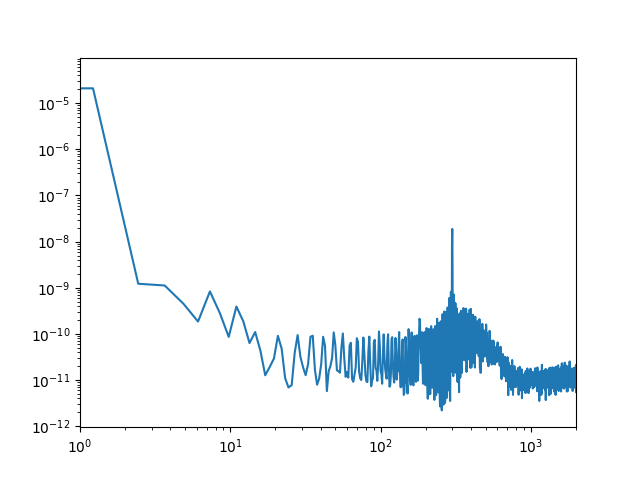

[(1, 2000)]

In [103]:
_,ax = plt.subplots()
ax.loglog(*bdf_x.welch_psd('x'))
ax.set(xlim=(1,2000))

In [43]:
reshape_num = 500
time = np.arange(0,10,1/5000*reshape_num)

resp_x_amp = bdf_x.response_at_freq2('x', drive_freq=140)*50000
resp_x_phase = bdf_x.response_at_freq3('x', drive_freq=140)/3
resp_x_angle = give_ab(resp_x_phase,resp_x_amp, reshape_num=reshape_num)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


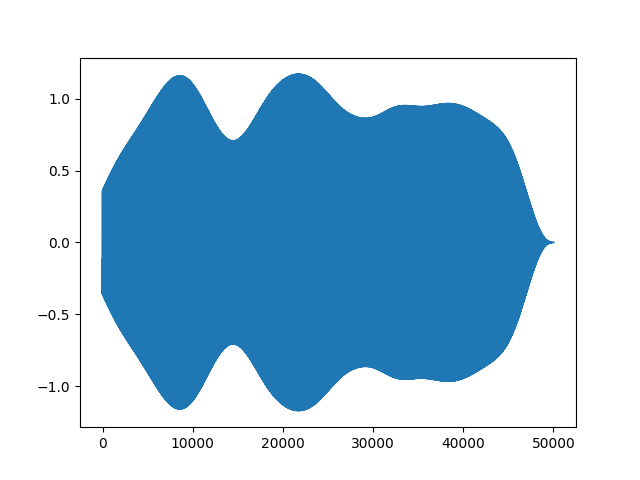

0.631583023809794

In [48]:
_,ax = plt.subplots()
ax.plot(range(50000),resp_x_amp)
np.std(resp_x_amp)

In [150]:
resp_shake_all_noshield = []
for B in bdf_repeat_shake_nobead:
    resp_shake_amp_tmp = B.response_at_freq2('x', drive_freq=65)*50000
    resp_shake_phase_tmp = B.response_at_freq3('x', drive_freq=65)/3
    resp_shake_angle_tmp = give_ab(resp_shake_phase_tmp,resp_shake_amp_tmp, reshape_num=reshape_num)
    resp_shake_all_noshield.append(resp_shake_angle_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [151]:
resp_shake_all_shield = []
for B in BDF_shaking2[:10]:
    resp_shake_amp_tmp = B.response_at_freq2('x', drive_freq=65)*50000
    resp_shake_phase_tmp = B.response_at_freq3('x', drive_freq=65)/3
    resp_shake_angle_tmp = give_ab(resp_shake_phase_tmp,resp_shake_amp_tmp, reshape_num=reshape_num)
    resp_shake_all_shield.append(resp_shake_angle_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


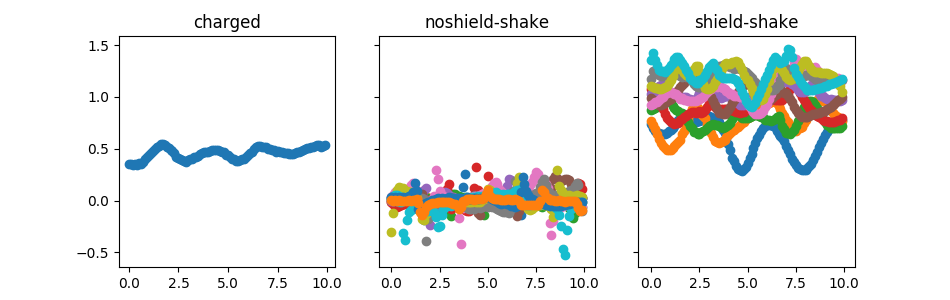

[Text(0.5, 1.0, 'shield-shake')]

In [152]:
_,ax = plt.subplots(1,3,figsize=(9.5,3),sharey=True)
ax[0].scatter(time,resp_x_angle)
ax[0].set(title='charged')
[ax[1].scatter(time,ss) for ss in resp_shake_all_noshield]
ax[1].set(title='noshield-shake')
[ax[2].scatter(time,ss) for ss in resp_shake_all_shield]
ax[2].set(title='shield-shake')

In [13]:
lc_i = likelihood_analyser.LikelihoodAnalyser()

Data overall time:  10.0  sec.
Bandpass filter ON. Bandwidth:  10 Hz
bandpass time:  0.0015168190002441406


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


minimization time:  0.3383631706237793
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.814   |   0.006   |            |            |    0    |   100   |       |
| 1 | f    |    105    |    10     |            |            |         |         |  yes  |
| 2 | phi  |  0.0E-4   |  0.9E-4   |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


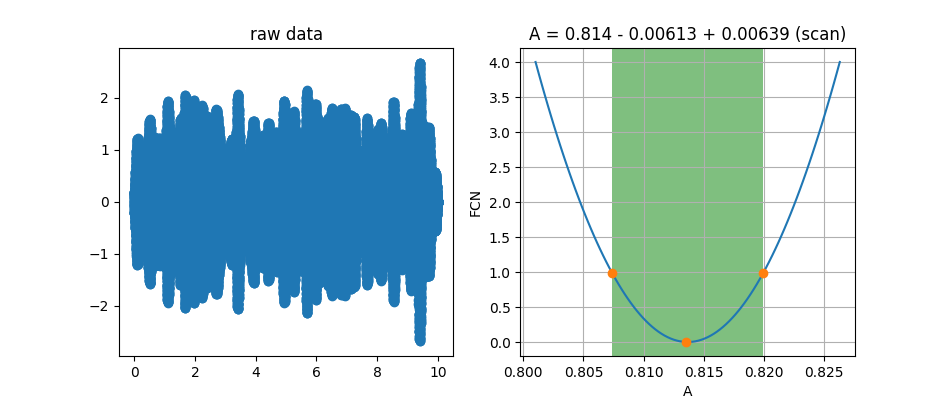

reduced chi2:  0.3178745309409344


In [133]:
# bdf_cal0 = bdf_repeat_calib[3]
# bdf_cal0 = bdf_repeat_shake_nobead[2]
# bdf_cal0 = BDF_shaking1[1]
bdf_cal0 = bdf_x
sig_x2 = bdf_cal0.x2*50000
sig_x3 = bdf_cal0.x3/3
freq = 105
fit_kwargs = {'A': 5, 'f': freq, 'phi': 0,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [0,100],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}

empirical_rms = 1
m1 = lc_i.find_mle_sin(sig_x2, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=True,
                       suppress_print=False, **fit_kwargs)

Data overall time:  10.0  sec.
Bandpass filter ON. Bandwidth:  10 Hz
bandpass time:  0.003545045852661133


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


minimization time:  1.5734002590179443
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         |   0.814   |   0.006   |            |            |    0    |  1000   |       |
| 1 | A2        |   1.657   |   0.015   |            |            |         |         |       |
| 2 | f         |    105    |    10     |            |            |         |         |  yes  |
| 3 | f2        |    105    |    10     |            |            |         |         |  yes  |
| 4 | phi       |  0.000E1  |  0.000E1  |            |            |    0    | 6.28319 |       |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
-----------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


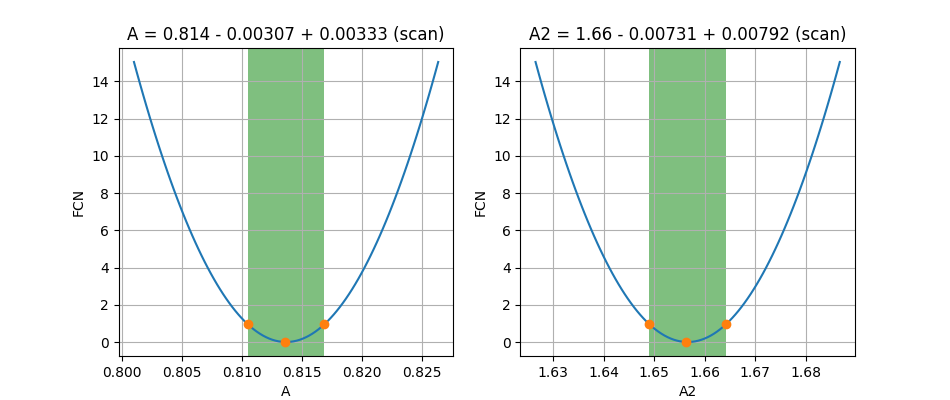

reduced chi2:  0.22514686883421536


In [96]:
# bdf_cal0 = bdf_repeat_calib[1]
# bdf_cal0 = bdf_repeat_shake_nobead[2]
# bdf_cal0 = BDF_shaking1[5]
# sig_x2 = bdf_cal0.x2*50000
# sig_x3 = bdf_cal0.x3/3
# freq = 104
fit_kwargs = {'A': 10, 'f': freq, 'phi': 0, 'A2': 2, 'f2': freq, 'delta_phi': 0,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 2, 'error_f2': 10, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi],'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [0,1000], #'limit_A2': [1.8,2.2],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': True, 'fix_A2': False}

m1 = lc_i.find_mle_2sin(sig_x2, sig_x3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=True,
                        suppress_print=False, **fit_kwargs)

### 1000 datasets

In [28]:
freq = 78
fit_kwargs = {'A': 5, 'f': freq, 'phi': 2.8,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [0,100],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}
empirical_rms = 1
m1_shaking_78 = [lc_i.find_mle_sin(bdf_.x2*50000, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=False,
                       suppress_print=True, **fit_kwargs) for bdf_ in BDF_shaking1]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


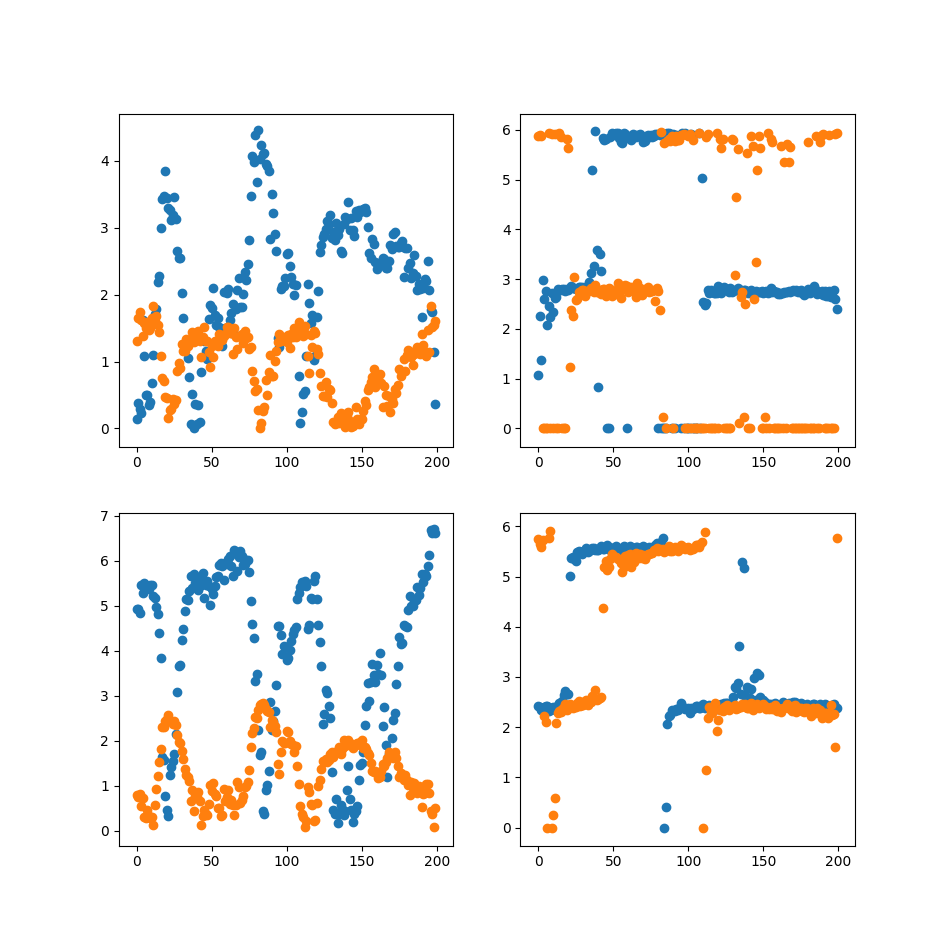

In [233]:
amps = [m1_.values[0] for m1_ in m1_shaking]
phases = [m1_.values[2] for m1_ in m1_shaking]

amps_x3 = [m1_.values[0] for m1_ in m1_shaking_x3]
phases_x3 = [m1_.values[2] for m1_ in m1_shaking_x3]


amps_26 = [m1_.values[0] for m1_ in m1_shaking_26]
phases_26 = [m1_.values[2] for m1_ in m1_shaking_26]

amps_39 = [m1_.values[0] for m1_ in m1_shaking_39]
phases_39 = [m1_.values[2] for m1_ in m1_shaking_39]

amps_x3_26 = [m1_.values[0] for m1_ in m1_shaking_x3_26]
phases_x3_26 = [m1_.values[2] for m1_ in m1_shaking_x3_26]

amps_78 = [m1_.values[0] for m1_ in m1_shaking_78]
phases_78 = [m1_.values[2] for m1_ in m1_shaking_78]

amps_x3_78 = [m1_.values[0] for m1_ in m1_shaking_x3_78]
phases_x3_78 = [m1_.values[2] for m1_ in m1_shaking_x3_78]

_,ax = plt.subplots(2,2,figsize=(9.5,9.5))
ax[0,0].scatter(range(len(amps)),amps)
ax[0,0].scatter(range(len(amps)),amps_x3)
ax[0,1].scatter(range(len(amps)),phases)
ax[0,1].scatter(range(len(amps)),phases_x3)
# ax[0,1].scatter(phases,amps)

ax[1,0].scatter(range(len(amps)),amps_78)
ax[1,0].scatter(range(len(amps)),amps_x3_78)
ax[1,1].scatter(range(len(amps)),phases_78)
ax[1,1].scatter(range(len(amps)),phases_x3_78)
# ax[1,1].scatter(amps_26,amps_x3_78)


<IPython.core.display.Javascript object>


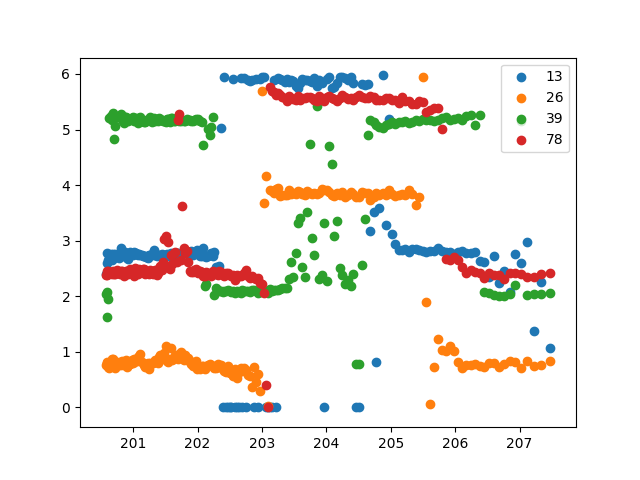

In [236]:
bdf_ = BDF_shaking1[0]
amp_pos = [np.mean(bdf_.cant_pos[1])*50 for bdf_ in BDF_shaking1]

_,ax = plt.subplots()
# ax.scatter(amp_pos, amps)
# ax.scatter(amp_pos, amps_x3)
# ax.scatter(amp_pos, amps_26)
# ax.scatter(amp_pos, amps_x3_26)
ax.scatter(amp_pos, phases, label='13')
ax.scatter(amp_pos, phases_26, label='26')
ax.scatter(amp_pos, phases_39, label='39')
ax.scatter(amp_pos, phases_78, label='78')
ax.legend()

In [29]:
freq = 78
fit_kwargs = {'A': 5, 'f': freq, 'phi': 1.5, 'A2': 5, 'phi2': 4.5,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 2, 'error_phi2': 0.5,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [0,100], 'limit_phi2': [0, 2 * np.pi], 'limit_A2': [0,100],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}
empirical_rms = 1
m1_shaking_78_bimodal = [lc_i.find_mle_sin(bdf_.x2*50000, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=False,
                       suppress_print=True,bimodal=True, **fit_kwargs) for bdf_ in BDF_shaking1]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [20]:
m1_shaking_13_bimodal[0].values

<ValueView of Minuit at 4658ab68>
  A: 5.040589435151488
  A2: 4.905387432250663
  f: 13.0
  phi: 1.4256588052412449
  phi2: 4.577303538226803

<IPython.core.display.Javascript object>


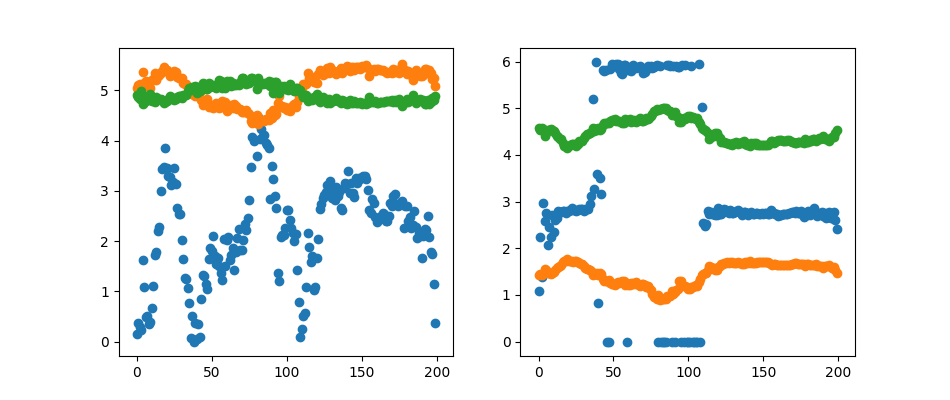

In [24]:
m1_amps = [m2_.values[0] for m2_ in m1_shaking_13]
m1_amps1_bi = [m2_.values[0] for m2_ in m1_shaking_13_bimodal]
m1_amps2_bi = [m2_.values[1] for m2_ in m1_shaking_13_bimodal]

m1_phases = [m2_.values[2] for m2_ in m1_shaking_13]
m1_phases1_bi = [m2_.values[3] for m2_ in m1_shaking_13_bimodal]
m1_phases2_bi = [m2_.values[4] for m2_ in m1_shaking_13_bimodal]

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(m1_amps)), m1_amps)
ax[0].scatter(range(len(m1_amps)), m1_amps1_bi)
ax[0].scatter(range(len(m1_amps)), m1_amps2_bi)

ax[1].scatter(range(len(m1_amps)), m1_phases)
ax[1].scatter(range(len(m1_amps)), m1_phases1_bi)
ax[1].scatter(range(len(m1_amps)), m1_phases2_bi)

<IPython.core.display.Javascript object>


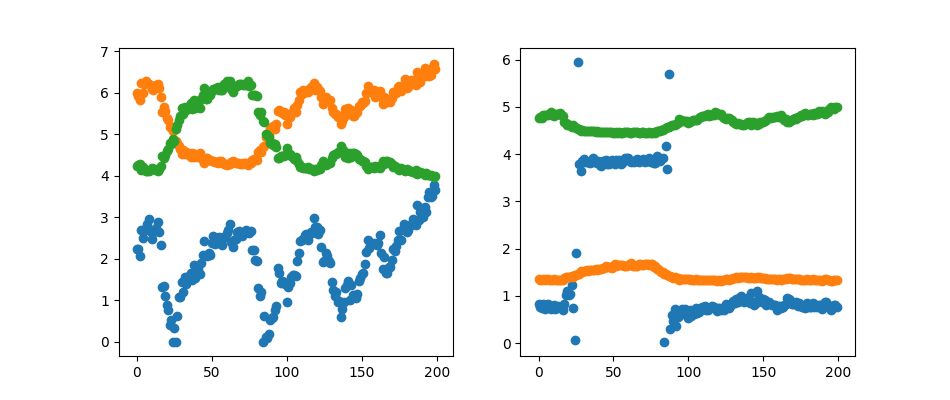

In [27]:
m1_amps = [m2_.values[0] for m2_ in m1_shaking_26]
m1_amps1_bi = [m2_.values[0] for m2_ in m1_shaking_26_bimodal]
m1_amps2_bi = [m2_.values[1] for m2_ in m1_shaking_26_bimodal]

m1_phases = [m2_.values[2] for m2_ in m1_shaking_26]
m1_phases1_bi = [m2_.values[3] for m2_ in m1_shaking_26_bimodal]
m1_phases2_bi = [m2_.values[4] for m2_ in m1_shaking_26_bimodal]

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(m1_amps)), m1_amps)
ax[0].scatter(range(len(m1_amps)), m1_amps1_bi)
ax[0].scatter(range(len(m1_amps)), m1_amps2_bi)

ax[1].scatter(range(len(m1_amps)), m1_phases)
ax[1].scatter(range(len(m1_amps)), m1_phases1_bi)
ax[1].scatter(range(len(m1_amps)), m1_phases2_bi)

<IPython.core.display.Javascript object>


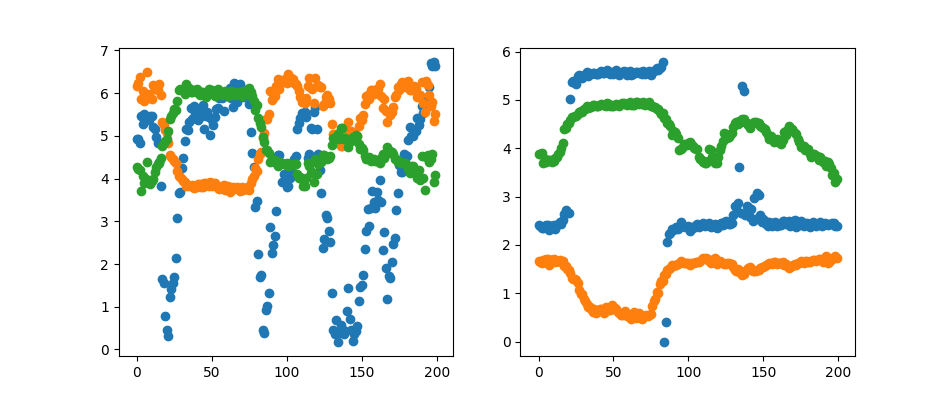

In [30]:
m1_amps = [m2_.values[0] for m2_ in m1_shaking_78]
m1_amps1_bi = [m2_.values[0] for m2_ in m1_shaking_78_bimodal]
m1_amps2_bi = [m2_.values[1] for m2_ in m1_shaking_78_bimodal]

m1_phases = [m2_.values[2] for m2_ in m1_shaking_78]
m1_phases1_bi = [m2_.values[3] for m2_ in m1_shaking_78_bimodal]
m1_phases2_bi = [m2_.values[4] for m2_ in m1_shaking_78_bimodal]

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(m1_amps)), m1_amps)
ax[0].scatter(range(len(m1_amps)), m1_amps1_bi)
ax[0].scatter(range(len(m1_amps)), m1_amps2_bi)

ax[1].scatter(range(len(m1_amps)), m1_phases)
ax[1].scatter(range(len(m1_amps)), m1_phases1_bi)
ax[1].scatter(range(len(m1_amps)), m1_phases2_bi)